In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from scipy.stats import shapiro, levene, ttest_ind
path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/case1202.csv'
case1202 = pd.read_csv(path)
case1202.head()

,Bsal,Sal77,Sex,Senior,Age,Educ,Exper
0,5040,12420,Male,96,329,15,14.0
1,6300,12060,Male,82,357,15,72.0
2,6000,15120,Male,67,315,15,35.5
3,6000,16320,Male,97,354,12,24.0
4,6000,12300,Male,66,351,12,56.0


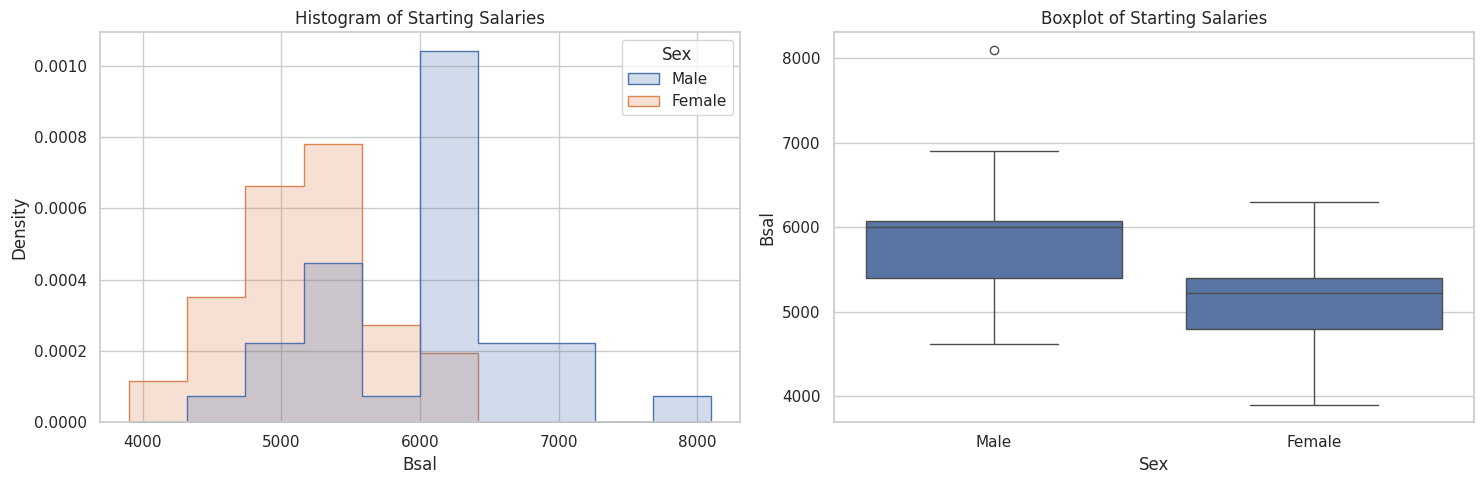

In [10]:
# Do men have a higher starting salary than women on average?
plt.figure(figsize=(15, 5))

# Plot histograms for female and male starting salaries side by side
plt.subplot(1, 2, 1)
sns.histplot(data=case1202, x='Bsal', hue='Sex', element="step", stat="density", common_norm=False)
plt.title("Histogram of Starting Salaries")

# Do boxplots for female and male starting salaries side by side
plt.subplot(1, 2, 2)
sns.boxplot(data=case1202, x='Sex', y='Bsal')
plt.title("Boxplot of Starting Salaries")

plt.tight_layout()
plt.show()

In [11]:
# Filter data based on gender
female = case1202[case1202['Sex'] == 'Female']
male = case1202[case1202['Sex'] == 'Male']

In [12]:
# Shapiro-Wilk test for normality
shapiro_female = shapiro(female['Bsal'])
shapiro_male = shapiro(male['Bsal'])

print("Shapiro-Wilk test for normality (Female):", shapiro_female)
print("Shapiro-Wilk test for normality (Male):", shapiro_male)

Shapiro-Wilk test for normality (Female): ShapiroResult(statistic=0.9755532145500183, pvalue=0.2604305148124695)
Shapiro-Wilk test for normality (Male): ShapiroResult(statistic=0.9228011965751648, pvalue=0.024782229214906693)


In [13]:
# Levene's test for equality of variances
levene_result = levene(female['Bsal'], male['Bsal'])

print("Levene's test for equality of variances:", levene_result)

Levene's test for equality of variances: LeveneResult(statistic=0.187603662593844, pvalue=0.6659435131902449)


In [14]:
# Independent two-sample t-test
ttest_result = ttest_ind(male['Bsal'], female['Bsal'], alternative='two-sided', equal_var=True)

print("Independent two-sample t-test:", ttest_result)

Independent two-sample t-test: TtestResult(statistic=6.292603535447412, pvalue=1.0756120401096012e-08, df=91.0)


In [15]:
print(ttest_result.confidence_interval())

ConfidenceInterval(low=559.798535934035, high=1076.2465460331782)


In [18]:
# Log-transform the 'Bsal' column
case1202['Bsal_log'] = case1202['Bsal'].apply(lambda x: np.log(x) if x > 0 else 0)

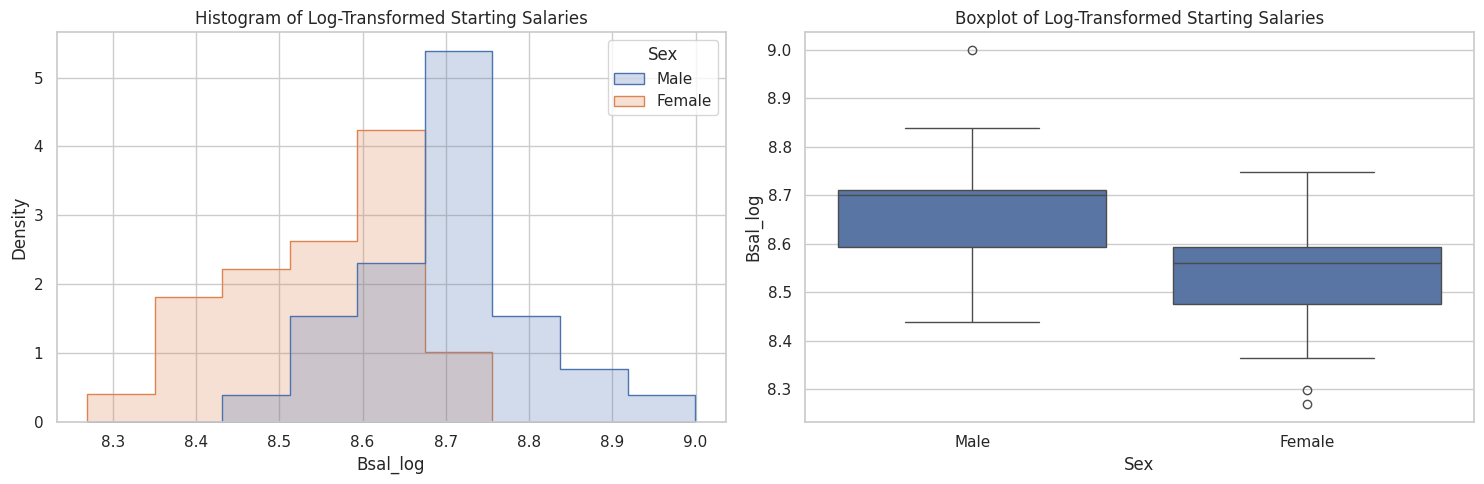

In [19]:
# Do men have a higher starting salary than women on average?
plt.figure(figsize=(15, 5))

# Plot histograms for female and male starting salaries side by side
plt.subplot(1, 2, 1)
sns.histplot(data=case1202, x='Bsal_log', hue='Sex', element="step", stat="density", common_norm=False)
plt.title("Histogram of Log-Transformed Starting Salaries")

# Do boxplots for female and male starting salaries side by side
plt.subplot(1, 2, 2)
sns.boxplot(data=case1202, x='Sex', y='Bsal_log')
plt.title("Boxplot of Log-Transformed Starting Salaries")

plt.tight_layout()
plt.show()

In [22]:
# Shapiro-Wilk test for normality
shapiro_female = shapiro(np.log(female['Bsal']))
shapiro_male = shapiro(np.log(male['Bsal']))

print("Shapiro-Wilk test for normality (log_Female):", shapiro_female)
print("Shapiro-Wilk test for normality (log_Male):", shapiro_male)

Shapiro-Wilk test for normality (log_Female): ShapiroResult(statistic=0.9692773818969727, pvalue=0.12818443775177002)
Shapiro-Wilk test for normality (log_Male): ShapiroResult(statistic=0.94309002161026, pvalue=0.09164272993803024)


In [24]:
# Levene's test for equality of variances
levene_result = levene(np.log(female['Bsal']), np.log(male['Bsal']))

print("Levene's test for equality of variances with log transformed data:", levene_result)

Levene's test for equality of variances with log transformed data: LeveneResult(statistic=0.15945181735372116, pvalue=0.6905973258855661)


In [29]:
np.median(male['Bsal'])

6000.0

In [31]:
np.mean(male['Bsal'])

5956.875

In [30]:
np.median(np.log(male['Bsal']))

8.699514748210191

In [32]:
np.log(np.median(male['Bsal']))

8.699514748210191

In [33]:
np.exp(np.median(np.log(male['Bsal'])))

5999.999999999995

In [34]:
np.exp(np.mean(np.log(male['Bsal'])))

5919.408056149968

# What does this tell us?

# What does a t-test represent under a log transform?

In [41]:
# Independent two-sample t-test
ttest_result = ttest_ind(np.log(male['Bsal']), np.log(female['Bsal']), alternative='two-sided', equal_var=True)
print("Independent two-sample t-test with log transformed data:", ttest_result)

Independent two-sample t-test with log transformed data: TtestResult(statistic=6.171479568807831, pvalue=1.8490634913481526e-08, df=91.0)


$H_0:$ mean(log(male['Bsal']))-mean(log(female['Bsal'])) = 0 vs

$H_A:$ mean(log(male['Bsal']))-mean(log(female['Bsal'])) > 0

#or equivalently (if normality conditions hold for transformed data)

$H_0:$ median(log(male['Bsal'])) - median(log(female['Bsal'])) = 0 vs

$H_A:$ median(log(male['Bsal'])) - median(log(female['Bsal'])) > 0

#or equivalently (since median(log())=log(median()))

$H_0:$ log(median(male['Bsal'])) - log(median(female['Bsal'])) = 0 vs

$H_A:$ log(median(male['Bsal'])) - log(median(female['Bsal'])) > 0

#or equivalently (since $log(x)-log(y)=log(x/y)$)

$H_0:$ log(median(male['Bsal']) / median(female['Bsal'])) = 0 vs

$H_A:$ log(median(male['Bsal']) / median(female['Bsal'])) > 0

#or equivalently (since $e^{log(x)}=x$ and $e^0=1$)

$H_0:$ median(male['Bsal']) / median(female['Bsal']) = exp(0)=1 vs

$H_A:$ median(male['Bsal']) / median(female['Bsal']) > exp(0)=1

#or equivalently

$H_0:$ median(male['Bsal']) = median(female['Bsal'])

$H_A:$ median(male['Bsal']) > median(female['Bsal'])

In [37]:
logmeandiff =np.mean(np.log(male['Bsal']))-np.mean(np.log(female['Bsal']))
logmeandiff

0.14694363613485883

In [38]:
np.exp(logmeandiff)

1.1582886755632416

# **Median** salary for males is 1.16 times as large as the **median** salary of females.

#Equivalently, the **median** salary for males is estimated to be 16% more than the **median** salary for females.

Note: the above result does not say anything about logs.

# What does the confidence interval say?

#95% confidence interval for the ratio of population median salaries is

In [42]:
ttest_result.confidence_interval()

ConfidenceInterval(low=0.09964776833950457, high=0.1942395039302131)

In [43]:
np.exp(.099)

1.104066299558882

In [44]:
np.exp(.19)

1.2092495976572515

# With this confidence interval, it is estimated that the median salary for males is between 11% and 21% greater than the median salary for females.

# Your turn:

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from scipy.stats import shapiro, levene, ttest_ind
path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/ex0330.csv'
#Education and future income
ex0330 = pd.read_csv(path)
ex0330.head()

,Subject,Educ,Income2005
0,2,12,5500
1,6,16,65000
2,7,12,19000
3,13,16,8000
4,21,16,253043


In [48]:
ex0330.describe()

,Subject,Educ,Income2005
count,1426.000000,1426.000000,1426.000000
mean,3503.067321,13.138850,46298.011921
std,2808.032631,1.805743,44877.837038
min,2.000000,12.000000,200.000000
25%,1590.250000,12.000000,21954.250000
50%,3038.000000,12.000000,35000.000000
75%,4628.250000,16.000000,57375.000000
max,12139.000000,16.000000,519340.000000


In [49]:
ex0330['Educ'].value_counts()

12    1020
16     406
Name: Educ, dtype: int64

# Do individuals with 12 years (high school) education make less money than those with 16 (College)?

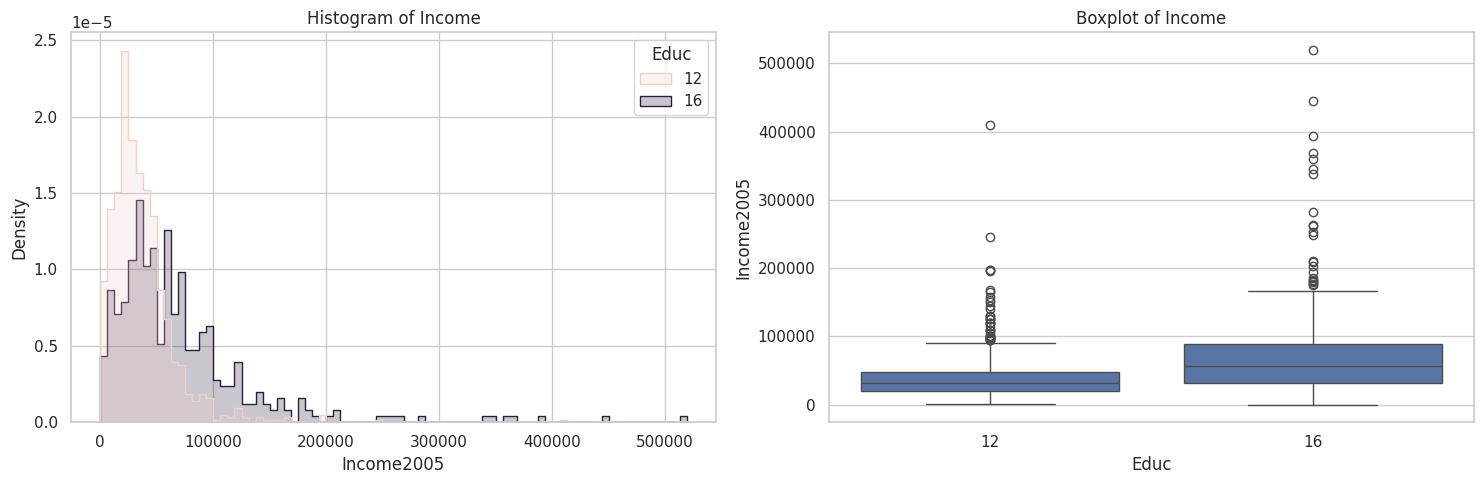

In [50]:
#Do individuals with 12 years (high school) education make less money than those with 16 (College)?
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=ex0330, x='Income2005', hue='Educ', element="step", stat="density", common_norm=False)
plt.title("Histogram of Income")

plt.subplot(1, 2, 2)
sns.boxplot(data=ex0330, x='Educ', y='Income2005')
plt.title("Boxplot of Income")

plt.tight_layout()
plt.show()

In [47]:
HS = ex0330[ex0330['Educ'] == 12]
College =  ex0330[ex0330['Educ'] == 16]

# Your turn:

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from scipy.stats import shapiro, levene, ttest_ind
#Agent Orange
path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/case0302.csv'
case0302 = pd.read_csv(path)
case0302.head()

,Dioxin,Veteran
0,0,Vietnam
1,0,Vietnam
2,0,Vietnam
3,0,Vietnam
4,0,Vietnam


Many Vietnam veterans are concerned that their health may have been affected by exposure to Agent Orange, a herbicide sprayed in South Vietnam between 1962 and 1970. The particularly worrisome component of Agent Orange is a dioxin called TCDD, which in high doses is known to be associated with certain cancers.

The 646 Vietnam veterans in the study were a sample of U.S. Army combat personnel who served in Vietnam during 1967 and 1968, in the areas that were most heavily treated with Agent Orange. The 97 non–Vietnam veterans entered the Army between 1965 and 1971 and served only in the United States or Germany. Neither sample was randomly selected.

In [52]:
case0302.describe()

,Dioxin
count,743.000000
mean,4.250336
std,2.599356
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,45.000000


In [55]:
case0302['Veteran'].value_counts()

Vietnam    646
Other       97
Name: Veteran, dtype: int64

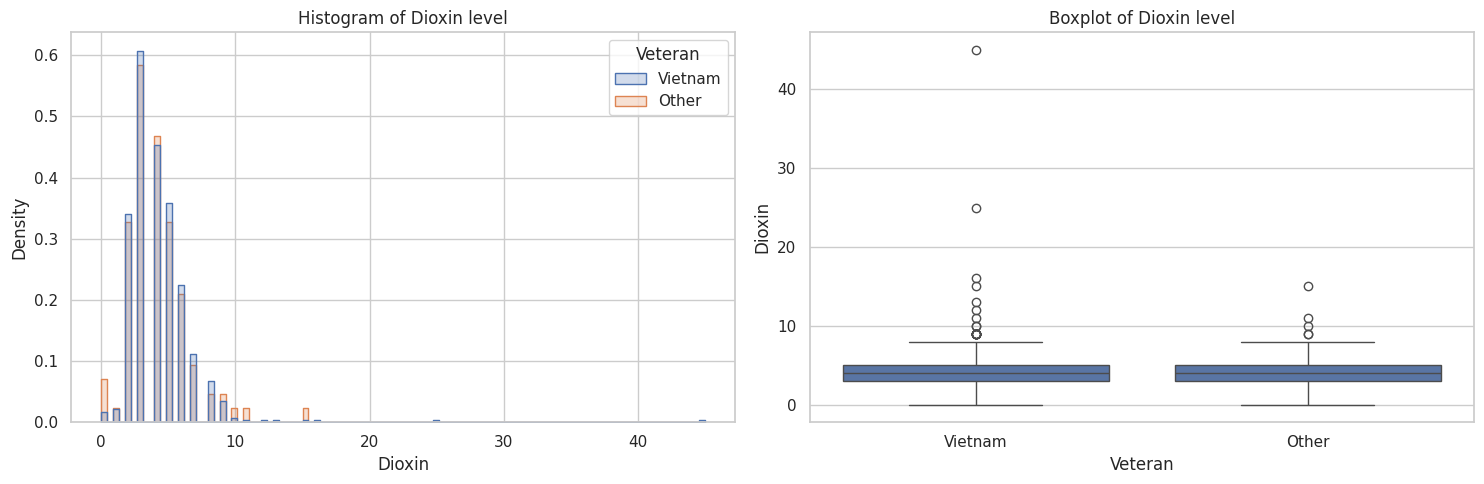

In [57]:
#Do individuals with 12 years (high school) education make less money than those with 16 (College)?
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=case0302, x='Dioxin', hue='Veteran', element="step", stat="density", common_norm=False)
plt.title("Histogram of Dioxin level")

plt.subplot(1, 2, 2)
sns.boxplot(data=case0302, x='Veteran', y='Dioxin')
plt.title("Boxplot of Dioxin level")

plt.tight_layout()
plt.show()

In [88]:
import numpy as np
from scipy.stats import ttest_ind

# Simulations on the t-test
n1 = 20  # Sample size 1
n2 = 15  # Sample size 2
mean1 = 1  # True population 1 mean
mean2 = 1.5 # True population 2 mean
sigma1 = 1  # Population 1 standard deviation
sigma2 = 1.5  # Population 2 standard deviation
count = 0
p_critical = 0.05

for i in range(100):
    data1 = np.random.normal(mean1, sigma1, n1)
    data2 = np.random.normal(mean2, sigma2, n2)
    t_stat, p_value = ttest_ind(data2, data1, alternative='greater', equal_var=False)

    if p_value < p_critical:
        count += 1  # Counts the number of times it is rejected out of 100

print(count / 100)


0.32


# What happens if you let mean1 = mean2 = 1?

# What does this tell you?

0.36


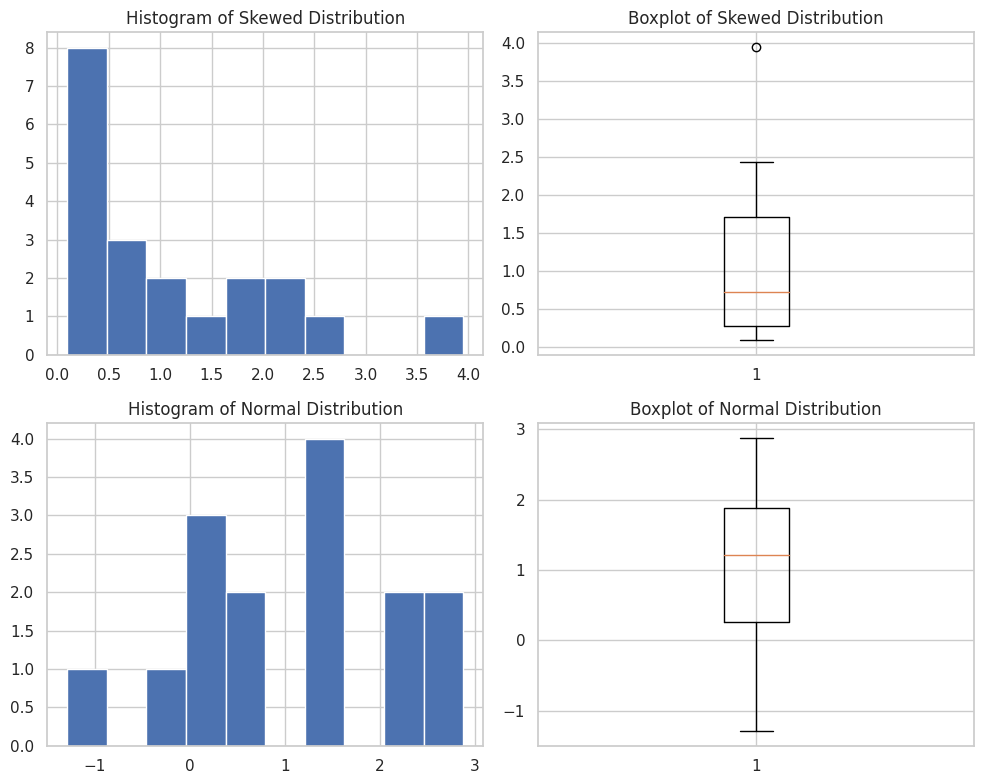

In [90]:
import numpy as np
from scipy.stats import ttest_ind, expon, norm
import matplotlib.pyplot as plt

# Simulations on the t-test with both a skewed and long-tailed distribution
n1 = 20  # Sample size 1
n2 = 15  # Sample size 2
mean1 = 1  # True population 1 mean
mean2 = 1.5  # True population 2 mean
count = 0
p_critical = 0.05

for i in range(100):
    data1 = np.random.exponential(scale=1 / mean1, size=n1)
    data2 = np.random.normal(loc=mean2, size=n2)
    t_stat, p_value = ttest_ind(data2, data1, alternative='greater', equal_var=False)

    if p_value < p_critical:
        count += 1  # Counts the number of times it is rejected out of 100

print(count / 100)

# This is what the distributions look like
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].hist(data1)
axes[0, 0].set_title("Histogram of Skewed Distribution")

axes[0, 1].boxplot(data1)
axes[0, 1].set_title("Boxplot of Skewed Distribution")

axes[1, 0].hist(data2)
axes[1, 0].set_title("Histogram of Normal Distribution")

axes[1, 1].boxplot(data2)
axes[1, 1].set_title("Boxplot of Normal Distribution")

plt.tight_layout()
plt.show()


#Questions:
#1. What happens if you change the two means and the sample size? What do you find?
#2. What happens if the two means are equal but you change the sample sizes
#What does this tell you?

In [91]:
import numpy as np
from scipy.stats import ttest_ind

def robust_simulation(n1, n2, sd1, sd2):
    counter = 0
    for i in range(1000):
        pop1 = np.random.normal(loc=1, scale=sd1, size=n1)
        pop2 = np.random.normal(loc=2, scale=sd2, size=n2)
        _, p_value = ttest_ind(pop1, pop2, equal_var=True)

        if p_value < 0.05:
            counter += 1

    print('The proportion of times we correctly reject the null hypothesis is:')
    print(counter / 1000)

# Simulate for different scenarios
robust_simulation(10, 15, 1, 1)
robust_simulation(50, 50, 1, 10)
robust_simulation(500, 500, 1, 2)


The proportion of times we correctly reject the null hypothesis is:
0.671
The proportion of times we correctly reject the null hypothesis is:
0.126
The proportion of times we correctly reject the null hypothesis is:
1.0


The proportion of times we correctly reject the null hypothesis is:
0.836


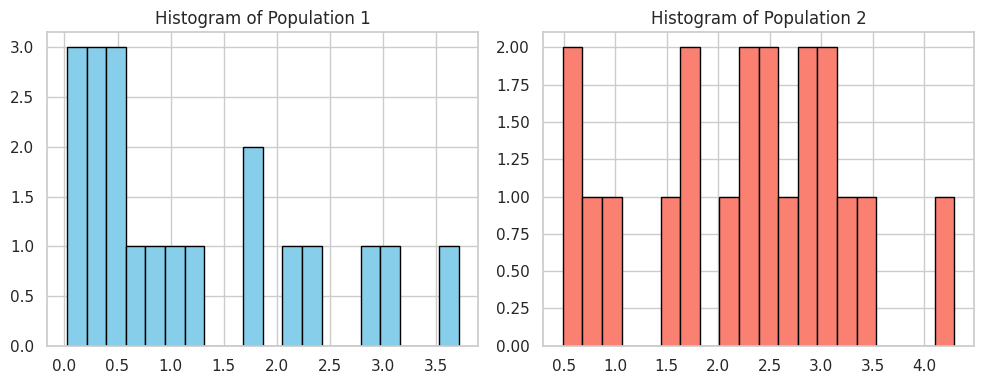

The proportion of times we correctly reject the null hypothesis is:
0.726


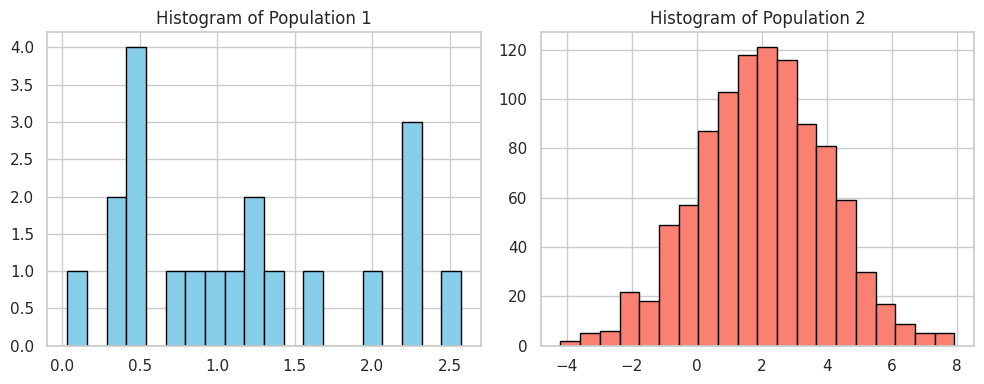

The proportion of times we correctly reject the null hypothesis is:
0.491


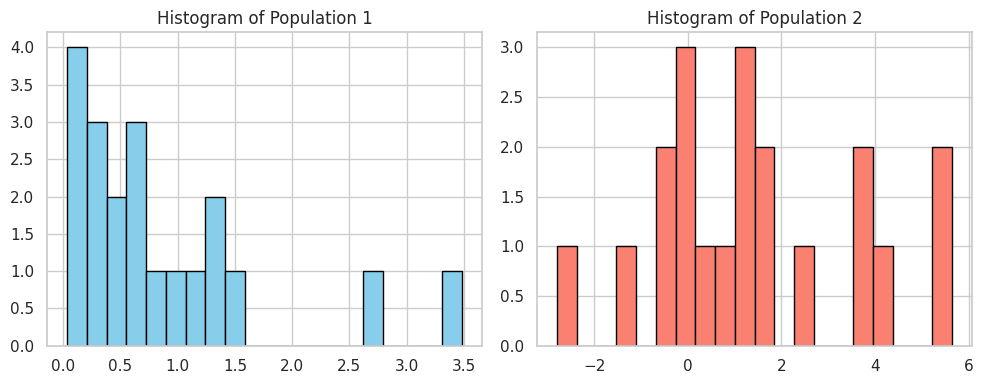

In [92]:
import numpy as np
from scipy.stats import ttest_ind, expon, norm
import matplotlib.pyplot as plt

def robust2_simulation(n1, n2, mu2, sd2):
    counter = 0
    for i in range(1000):
        pop1 = np.random.exponential(scale=1, size=n1)
        pop2 = np.random.normal(loc=mu2, scale=sd2, size=n2)
        _, p_value = ttest_ind(pop1, pop2, equal_var=True)

        if p_value < 0.05:
            counter += 1

    print('The proportion of times we correctly reject the null hypothesis is:')
    print(counter / 1000)

    # Plot histograms for the last simulation
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(pop1, bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram of Population 1')

    plt.subplot(1, 2, 2)
    plt.hist(pop2, bins=20, color='salmon', edgecolor='black')
    plt.title('Histogram of Population 2')

    plt.tight_layout()
    plt.show()

# Simulate for different scenarios
robust2_simulation(20, 20, 2, 1)
robust2_simulation(20, 1000, 2, 2)
robust2_simulation(20, 20, 2, 2)


#Unequal population sds have little effect on validility if the sample sizes are equal.
#for substantially different sds and sample sizes, tests are not reliable.